In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

from vale import construct_model
import numpy as np
import os
import clapp.common.utils      as clapp_utils

# ... initializing Clapp
clapp_utils.initialize()
# ...

In [34]:
# ...
def construct_form(filename, mapping, discretization):
    # ... clean input directory. needed for Fortran
    cmd = "rm -rf input"
    os.system(cmd)
    # ...

    # ... creates discretization parameters
    from clapp.disco.parameters.bspline import BSpline

    bspline_params = BSpline(discretization["n_elements"], \
                             discretization["degrees"], \
                             bc_min=[0,0], \
                             bc_max=[0,0])
    # ...

    # ... create a context from discretization
    from clapp.fema.context        import Context

    context = Context(dirname="input", \
                      discretization_params=bspline_params)
    # ...

    # ...
    pde = construct_model(filename, backend="clapp", \
                          context=context, mapping=mapping)
    # ...

    # ... accessing the pde declarations
    V           = pde["V"]
    form_a      = pde["a"]
    # ...

    # ...
    assembler_a = form_a.assembler
    matrix      = form_a.matrix
    # ...

    # ...
    assembler_a.assemble()
    # ...
    
    # ... clean input directory
    cmd = "rm -rf input"
    os.system(cmd)
    # ...
    
    return form_a
# ...

In [35]:
# ... creates a unit square geometry using CAID
from caid.cad_geometry import square
geometry = square()
# ...
    
# ...
from clapp.spl.mapping import Mapping
mapping = Mapping(geometry=geometry)
# ...

In [36]:
# ... define a discretization
discretization = {"n_elements": [32,32], \
                  "degrees": [2,2]}
# ...

In [37]:
# ... discretize the bilinear form
form = construct_form(filename="../../glt/tests/2d/inputs/poisson.vl", \
                      mapping=mapping, \
                      discretization=discretization)
# ...

In [38]:
# ... compute the glt symbol without evaluation
from glt.expression import glt_symbol_from_weak_formulation
from glt.expression import glt_plot_eigenvalues


expr = glt_symbol_from_weak_formulation(form, \
                       verbose=False, evaluate=False, \
                       discretization=discretization)
# ...

In [39]:
from IPython.display import Math;
from glt.printing.latex import glt_latex;
Math(glt_latex(expr))

<IPython.core.display.Math object>

In [40]:
# ... compute the glt symbol and evaluate it
from glt.expression import glt_symbol_from_weak_formulation
from glt.expression import glt_plot_eigenvalues


expr = glt_symbol_from_weak_formulation(form, \
                       verbose=False, evaluate=True, \
                       discretization=discretization)
# ...

In [41]:
Math(glt_latex(expr))

<IPython.core.display.Math object>

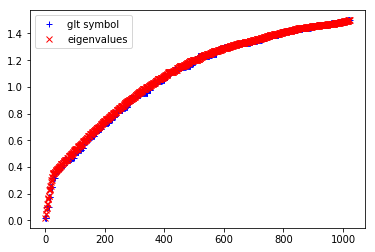

In [44]:
# ...
glt_plot_eigenvalues(expr, discretization, \
                     mapping=mapping, \
                     matrix=form.matrix)

plt.legend(loc=2);
# ...

In [22]:
# ... Finalizing Clapp
clapp_utils.finalize()
# ...